In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os

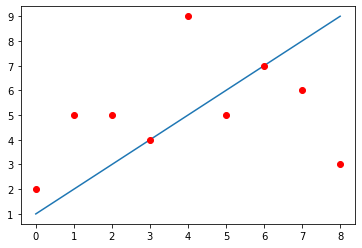

In [12]:
plt.plot(np.arange(1,10));
plt.plot(np.random.randint(1,10, size=9), 'ro');

In [35]:
# Reading source data
# https://archive.ics.uci.edu/ml/datasets/Caesarian+Section+Classification+Dataset

# I used the following to get the arff files converted to csv
# https://stackoverflow.com/a/64237440/5820024
# The solution of https://stackoverflow.com/users/13283137/shubham-mishra

path_to_directory = "./Datasets/"
files = [
    arff for arff in os.listdir(path_to_directory) if arff.endswith(".arff")
]


def toCsv(content):
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute") + 1]
                # added by DrNesr
                columnName =columnName.replace("'", "").replace('"', "")
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent


# Main loop for reading and writing files
for zzzz, file in enumerate(files):
    with open(path_to_directory + file, "r") as inFile:
        content = inFile.readlines()
        name, ext = os.path.splitext(inFile.name)
        new = toCsv(content)
        with open(name + ".csv", "w") as outFile:
            outFile.writelines(new)
            # added by DrNesr
            print(f'The file {name}.csv has been exported successfully')

The file ./Datasets/caesarian.csv has been exported successfully


In [36]:
df = pd.read_csv('./Datasets/caesarian.csv')
df.head()

,Age,Delivery,Delivery.1,Blood,Heart,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [33]:
# heads=list(df.columns)
# heads
# ["'Age'", "'Delivery", "'Delivery.1", "'Blood", "'Heart", 'Caesarian']

["'Age'", "'Delivery", "'Delivery.1", "'Blood", "'Heart", 'Caesarian']

In [34]:
# h=heads[0]
# h.replace("'","")
# heads=list(map(lambda x:x.replace("'",""), heads))
# heads
# ['Age', 'Delivery', 'Delivery.1', 'Blood', 'Heart', 'Caesarian']

['Age', 'Delivery', 'Delivery.1', 'Blood', 'Heart', 'Caesarian']